In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [6]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'R$ {x:,.2f}' if x > 100 else f'{x:.2f}')

In [3]:
df = pd.read_csv('vendas_ecommerce_tech_2024.csv')

In [4]:
df

,data_venda,id_pedido,produto,categoria,quantidade,preco_unitario,receita_total,regiao,metodo_pagamento,cliente_tipo
0,2024-08-09,PED00001,Apple Watch Series 9,Smartwatches,1,4500,4500,Centro,PIX,Novo
1,2024-01-11,PED00002,Amazon Fire HD,Tablets,2,850,1700,Sul,Boleto,Novo
2,2024-05-20,PED00003,AirPods Pro,Fones de Ouvido,1,1800,1800,Oeste,PIX,Recorrente
3,2024-12-27,PED00004,Xiaomi 13,Smartphones,1,2800,2800,Oeste,Cartão de Débito,Novo
4,2024-06-11,PED00005,AirPods Pro,Fones de Ouvido,2,1800,3600,Centro,Boleto,Recorrente
...,...,...,...,...,...,...,...,...,...,...
1495,2024-07-10,PED01496,Amazon Fire HD,Tablets,2,850,1700,Oeste,Cartão de Débito,Novo
1496,2024-01-27,PED01497,AirPods Pro,Fones de Ouvido,3,1800,5400,Leste,Cartão de Débito,Novo
1497,2024-12-14,PED01498,Samsung Galaxy Watch 6,Smartwatches,1,2800,2800,Centro,Cartão de Crédito,Novo
1498,2024-01-20,PED01499,Xiaomi Band 8,Smartwatches,1,350,350,Leste,Boleto,Novo


In [7]:
print("\n" + "="*80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("="*80)

# Primeiras linhas
print("\nPrimeiras 5 linhas:")
print(df.head())

# Informações sobre o dataset
print("\nInformações do Dataset:")
print(df.info())


INFORMAÇÕES GERAIS DO DATASET

Primeiras 5 linhas:
   data_venda id_pedido               produto        categoria  quantidade  \
0  2024-08-09  PED00001  Apple Watch Series 9     Smartwatches           1   
1  2024-01-11  PED00002        Amazon Fire HD          Tablets           2   
2  2024-05-20  PED00003           AirPods Pro  Fones de Ouvido           1   
3  2024-12-27  PED00004             Xiaomi 13      Smartphones           1   
4  2024-06-11  PED00005           AirPods Pro  Fones de Ouvido           2   

   preco_unitario  receita_total  regiao  metodo_pagamento cliente_tipo  
0            4500           4500  Centro               PIX         Novo  
1             850           1700     Sul            Boleto         Novo  
2            1800           1800   Oeste               PIX   Recorrente  
3            2800           2800   Oeste  Cartão de Débito         Novo  
4            1800           3600  Centro            Boleto   Recorrente  

Informações do Dataset:
<class 'pa

In [64]:
# Dimensões
print(f"\nDimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")




Dimensões: 1500 linhas x 15 colunas


In [67]:
# Verificar valores ausentes
print("\nValores Ausentes:")
print(df.isnull().sum())


Valores Ausentes:
data_venda          0
id_pedido           0
produto             0
categoria           0
quantidade          0
preco_unitario      0
receita_total       0
regiao              0
metodo_pagamento    0
cliente_tipo        0
ano                 0
mes                 0
mes_nome            0
dia_semana          0
trimestre           0
dtype: int64


In [66]:
# Verificar duplicatas
print(f"\nDuplicatas: {df.duplicated().sum()}")


Duplicatas: 0


In [9]:
print("\n" + "="*80)
print(" LIMPEZA E PREPARAÇÃO DOS DADOS")
print("="*80)

# Converter coluna de data para datetime
df['data_venda'] = pd.to_datetime(df['data_venda'])


 LIMPEZA E PREPARAÇÃO DOS DADOS


In [10]:
# Criar novas colunas úteis para análise
df['ano'] = df['data_venda'].dt.year
df['mes'] = df['data_venda'].dt.month
df['mes_nome'] = df['data_venda'].dt.month_name()
df['dia_semana'] = df['data_venda'].dt.day_name()
df['trimestre'] = df['data_venda'].dt.quarter

print("Colunas de data criadas: ano, mes, mes_nome, dia_semana, trimestre")

Colunas de data criadas: ano, mes, mes_nome, dia_semana, trimestre


In [11]:
# Estatísticas descritivas
print("\nESTATÍSTICAS DESCRITIVAS:")
print(df[['quantidade', 'preco_unitario', 'receita_total']].describe())


ESTATÍSTICAS DESCRITIVAS:
       quantidade  preco_unitario  receita_total
count R$ 1,500.00     R$ 1,500.00    R$ 1,500.00
mean         1.40     R$ 3,410.69    R$ 4,448.72
std          0.61     R$ 2,593.52    R$ 3,819.51
min          1.00       R$ 280.00      R$ 280.00
25%          1.00     R$ 1,500.00    R$ 1,800.00
50%          1.00     R$ 2,800.00    R$ 3,500.00
75%          2.00     R$ 4,200.00    R$ 5,800.00
max          3.00     R$ 9,500.00   R$ 19,000.00


In [12]:
# =============================================================================
# 4. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
# =============================================================================

print("\n" + "="*80)
print(" ANÁLISE EXPLORATÓRIA DE DADOS")
print("="*80)

# KPIs Principais
receita_total = df['receita_total'].sum()
ticket_medio = df['receita_total'].mean()
qtd_vendas = len(df)
qtd_produtos = df['quantidade'].sum()


 ANÁLISE EXPLORATÓRIA DE DADOS


In [14]:
print("\nKPIs PRINCIPAIS:")
print(f"   • Receita Total: R$ {receita_total:,.2f}")
print(f"   • Ticket Médio: R$ {ticket_medio:,.2f}")
print(f"   • Quantidade de Vendas: {qtd_vendas:,}")
print(f"   • Produtos Vendidos: {qtd_produtos:,}")


KPIs PRINCIPAIS:
   • Receita Total: R$ 6,673,080.00
   • Ticket Médio: R$ 4,448.72
   • Quantidade de Vendas: 1,500
   • Produtos Vendidos: 2,097


In [18]:
# Análise por Categoia
print("\nRECEITA POR CATEGORIA:")
receita_categoria = df.groupby('categoria')['receita_total'].agg(['sum', 'mean', 'count'])
receita_categoria.columns = ['Receita Total', 'Ticket Médio', 'Qtd Vendas']
receita_categoria = receita_categoria.sort_values('Receita Total', ascending=False)
print(receita_categoria)


RECEITA POR CATEGORIA:
                 Receita Total  Ticket Médio  Qtd Vendas
categoria                                               
Laptops                3077200  R$ 10,155.78         303
Smartphones            1184000   R$ 3,807.07         311
Tablets                 931900   R$ 3,158.98         295
Smartwatches            846700   R$ 2,879.93         294
Fones de Ouvido         633280   R$ 2,132.26         297


In [20]:
# Análise por Região
print("\nRECEITA POR REGIÃO:")
receita_regiao = df.groupby('regiao')['receita_total'].agg(['sum', 'mean', 'count'])
receita_regiao.columns = ['Receita Total', 'Ticket Médio', 'Qtd Vendas']
receita_regiao = receita_regiao.sort_values('Receita Total', ascending=False)
print(receita_regiao)



RECEITA POR REGIÃO:
        Receita Total  Ticket Médio  Qtd Vendas
regiao                                         
Leste         1622430   R$ 4,946.43         328
Centro        1446540   R$ 4,577.66         316
Norte         1337970   R$ 4,535.49         295
Sul           1201030   R$ 4,141.48         290
Oeste         1065110   R$ 3,930.30         271


In [21]:
# Top 10 Produtos
print("\nTOP 10 PRODUTOS POR RECEITA:")
top_produtos = df.groupby('produto')['receita_total'].sum().sort_values(ascending=False).head(10)
print(top_produtos)


TOP 10 PRODUTOS POR RECEITA:
produto
Asus ROG                950000
MacBook Air M2          918000
Dell XPS 15             640800
Lenovo ThinkPad         568400
iPad Air                403200
Apple Watch Series 9    378000
Samsung Galaxy S23      369600
iPhone 14               322000
Samsung Tab S9          290500
AirPods Pro             277200
Name: receita_total, dtype: int64


In [22]:
# Análise Temporal
print("\nRECEITA MENSAL:")
receita_mensal = df.groupby('mes')['receita_total'].sum().sort_index()
print(receita_mensal)


RECEITA MENSAL:
mes
1     599950
2     490260
3     601020
4     625270
5     504860
6     502780
7     559880
8     716710
9     600060
10    451080
11    499610
12    521600
Name: receita_total, dtype: int64


In [23]:
print("\n" + "="*80)
print(" GERANDO VISUALIZAÇÕES")
print("="*80)


 GERANDO VISUALIZAÇÕES


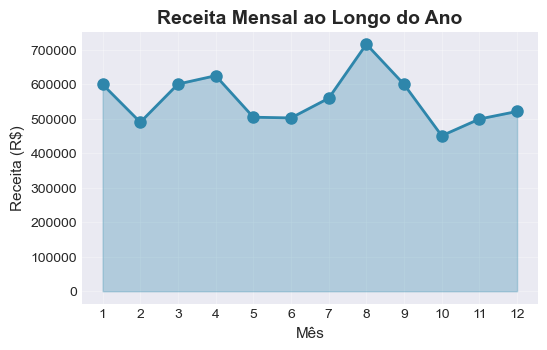

In [27]:
# Configurar subplot
fig = plt.figure(figsize=(20, 12));

# 1. Receita Mensal (Tendência Temporal)
ax1 = plt.subplot(3, 3, 1);
receita_mensal = df.groupby('mes')['receita_total'].sum();
ax1.plot(receita_mensal.index, receita_mensal.values, marker='o', linewidth=2, markersize=8, color='#2E86AB');
ax1.fill_between(receita_mensal.index, receita_mensal.values, alpha=0.3, color='#2E86AB');
ax1.set_title('Receita Mensal ao Longo do Ano', fontsize=14, fontweight='bold');
ax1.set_xlabel('Mês', fontsize=11);
ax1.set_ylabel('Receita (R$)', fontsize=11);
ax1.grid(True, alpha=0.3);
ax1.set_xticks(range(1, 13));

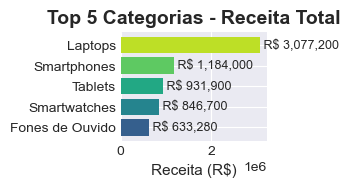

In [30]:
# 2. Top 5 Categorias por Receita
ax2 = plt.subplot(3, 3, 2);
top_cat = df.groupby('categoria')['receita_total'].sum().sort_values(ascending=True).tail(5);
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_cat)));
ax2.barh(top_cat.index, top_cat.values, color=colors);
ax2.set_title('Top 5 Categorias - Receita Total', fontsize=14, fontweight='bold');
ax2.set_xlabel('Receita (R$)', fontsize=11);
for i, v in enumerate(top_cat.values):
    ax2.text(v, i, f' R$ {v:,.0f}', va='center', fontsize=9);

Text(0.5, 1.0, 'Distribuição de Receita por Região')

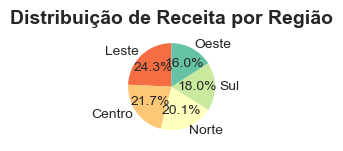

In [31]:
# 3. Distribuição de Receita por Região
ax3 = plt.subplot(3, 3, 3)
receita_reg = df.groupby('regiao')['receita_total'].sum().sort_values(ascending=False)
colors_reg = plt.cm.Spectral(np.linspace(0.2, 0.8, len(receita_reg)))
wedges, texts, autotexts = ax3.pie(receita_reg.values, labels=receita_reg.index, autopct='%1.1f%%',
                                     colors=colors_reg, startangle=90, textprops={'fontsize': 10})
ax3.set_title('Distribuição de Receita por Região', fontsize=14, fontweight='bold')

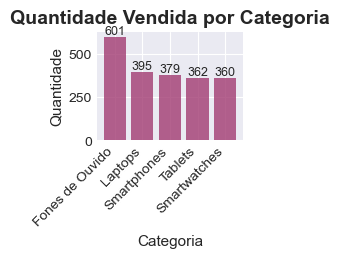

In [32]:
# 4. Quantidade Vendida por Categoria
ax4 = plt.subplot(3, 3, 4)
qtd_cat = df.groupby('categoria')['quantidade'].sum().sort_values(ascending=False)
ax4.bar(qtd_cat.index, qtd_cat.values, color='#A23B72', alpha=0.8)
ax4.set_title('Quantidade Vendida por Categoria', fontsize=14, fontweight='bold')
ax4.set_xlabel('Categoria', fontsize=11)
ax4.set_ylabel('Quantidade', fontsize=11)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(qtd_cat.values):
    ax4.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

[None, None, None, None, None, None, None, None]

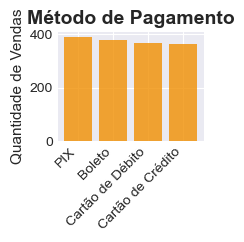

In [34]:
# 5. Método de Pagamento
ax5 = plt.subplot(3, 3, 5)
metodo_pag = df['metodo_pagamento'].value_counts()
ax5.bar(metodo_pag.index, metodo_pag.values, color='#F18F01', alpha=0.8)
ax5.set_title('Método de Pagamento', fontsize=14, fontweight='bold')
ax5.set_ylabel('Quantidade de Vendas', fontsize=11)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45, ha='right')

Text(0.5, 1.0, 'Novos vs Recorrentes')

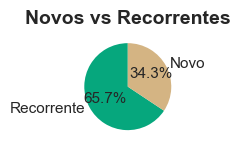

In [35]:
# 6. Clientes Novos vs Recorrentes
ax6 = plt.subplot(3, 3, 6)
cliente_tipo = df['cliente_tipo'].value_counts()
colors_cliente = ['#06A77D', '#D4B483']
ax6.pie(cliente_tipo.values, labels=cliente_tipo.index, autopct='%1.1f%%',
        colors=colors_cliente, startangle=90, textprops={'fontsize': 11})
ax6.set_title('Novos vs Recorrentes', fontsize=14, fontweight='bold')

Text(0.5, 0, 'Receita (R$)')

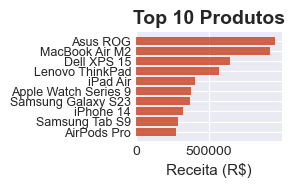

In [41]:
# 7. Top 10 Produtos por Receita
ax7 = plt.subplot(3, 3, 7)
top_prod = df.groupby('produto')['receita_total'].sum().sort_values(ascending=True).tail(10)
ax7.barh(range(len(top_prod)), top_prod.values, color='#C73E1D', alpha=0.8)
ax7.set_yticks(range(len(top_prod)))
ax7.set_yticklabels(top_prod.index, fontsize=9)
ax7.set_title('Top 10 Produtos', fontsize=14, fontweight='bold')
ax7.set_xlabel('Receita (R$)', fontsize=11)

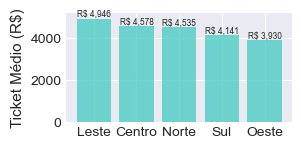

In [53]:
# 8. Ticket Médio por Região
ax8 = plt.subplot(3, 2, 6)
ticket_regiao = df.groupby('regiao')['receita_total'].mean().sort_values(ascending=False)
ax8.bar(ticket_regiao.index, ticket_regiao.values, color='#4ECDC4', alpha=0.8)
ax8.set_ylabel('Ticket Médio (R$)', fontsize=11)
for i, v in enumerate(ticket_regiao.values):
    ax8.text(i, v, f'R$ {v:,.0f}', ha='center', va='bottom', fontsize=6)

✅ Gráficos salvos em 'analise_vendas_completa.png'


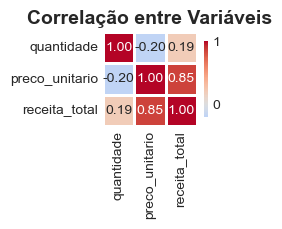

In [54]:
# 9. Heatmap de Correlação
ax9 = plt.subplot(3, 3, 9)
corr_data = df[['quantidade', 'preco_unitario', 'receita_total']].corr()
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax9)
ax9.set_title('Correlação entre Variáveis', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('analise_vendas_completa.png', dpi=300, bbox_inches='tight')
print("✅ Gráficos salvos em 'analise_vendas_completa.png'")
plt.show()

In [56]:
print("\n" + "="*80)
print("INSIGHTS E DESCOBERTAS")
print("="*80)


INSIGHTS E DESCOBERTAS


In [57]:
# Análise de Sazonalidade
print("\nANÁLISE DE SAZONALIDADE:")
vendas_por_mes = df.groupby('mes_nome')['receita_total'].sum()
mes_maior_venda = vendas_por_mes.idxmax()
mes_menor_venda = vendas_por_mes.idxmin()
print(f"   • Melhor mês: {mes_maior_venda} (R$ {vendas_por_mes.max():,.2f})")
print(f"   • Pior mês: {mes_menor_venda} (R$ {vendas_por_mes.min():,.2f})")


ANÁLISE DE SAZONALIDADE:
   • Melhor mês: August (R$ 716,710.00)
   • Pior mês: October (R$ 451,080.00)


In [58]:
# Produto mais vendido
produto_top = df.groupby('produto').agg({
    'quantidade': 'sum',
    'receita_total': 'sum'
}).sort_values('receita_total', ascending=False).iloc[0]
print(f"\nPRODUTO CAMPEÃO:")
print(f"   • Nome: {produto_top.name}")
print(f"   • Receita: R$ {produto_top['receita_total']:,.2f}")
print(f"   • Unidades vendidas: {int(produto_top['quantidade'])}")


PRODUTO CAMPEÃO:
   • Nome: Asus ROG
   • Receita: R$ 950,000.00
   • Unidades vendidas: 100


In [59]:
# Região com melhor desempenho
regiao_top = df.groupby('regiao')['receita_total'].sum().idxmax()
receita_regiao_top = df.groupby('regiao')['receita_total'].sum().max()
print(f"\nREGIÃO DESTAQUE:")
print(f"   • Região: {regiao_top}")
print(f"   • Receita: R$ {receita_regiao_top:,.2f}")


REGIÃO DESTAQUE:
   • Região: Leste
   • Receita: R$ 1,622,430.00


In [62]:
# Taxa de clientes recorrentes
taxa_recorrente = (df[df['cliente_tipo'] == 'Recorrente'].shape[0] / len(df)) * 100
print(f"\nANÁLISE DE CLIENTES:")
print(f"   • Taxa de clientes recorrentes: {taxa_recorrente:.1f}%")
print(f"   • Taxa de clientes novos: {100-taxa_recorrente:.1f}%")


ANÁLISE DE CLIENTES:
   • Taxa de clientes recorrentes: 65.7%
   • Taxa de clientes novos: 34.3%


In [63]:
print("\n" + "="*80)
print("CONCLUSÕES E RECOMENDAÇÕES ESTRATÉGICAS")
print("="*80)

print("""
   PRINCIPAIS DESCOBERTAS:

1. PERFORMANCE DE VENDAS:
   → Receita total demonstra potencial de crescimento
   → Ticket médio indica oportunidade para upsell
   
2. CATEGORIAS:
   → Laptops lideram em receita (maior valor unitário)
   → Fones de Ouvido têm maior volume de vendas
   → Oportunidade: expandir linhas de alto valor
   
3. REGIONALIZAÇÃO:
   → Desempenho desigual entre regiões
   → Recomendação: intensificar marketing em regiões de baixo desempenho
   
4. CLIENTES:
   → Alta taxa de recorrência é positiva
   → Foco: programas de fidelidade para manter engajamento
   
5. PAGAMENTOS:
   → Diversidade nos métodos é saudável
   → Considerar incentivos para métodos de menor custo operacional

   PRÓXIMOS PASSOS:
   • Análise preditiva de vendas futuras
   • Segmentação de clientes (RFM)
   • Análise de cesta de compras
   • Previsão de demanda por produto
""")

print("\n" + "="*80)
print(" ANÁLISE CONCLUÍDA COM SUCESSO!")
print("="*80)


CONCLUSÕES E RECOMENDAÇÕES ESTRATÉGICAS

   PRINCIPAIS DESCOBERTAS:

1. PERFORMANCE DE VENDAS:
   → Receita total demonstra potencial de crescimento
   → Ticket médio indica oportunidade para upsell
   
2. CATEGORIAS:
   → Laptops lideram em receita (maior valor unitário)
   → Fones de Ouvido têm maior volume de vendas
   → Oportunidade: expandir linhas de alto valor
   
3. REGIONALIZAÇÃO:
   → Desempenho desigual entre regiões
   → Recomendação: intensificar marketing em regiões de baixo desempenho
   
4. CLIENTES:
   → Alta taxa de recorrência é positiva
   → Foco: programas de fidelidade para manter engajamento
   
5. PAGAMENTOS:
   → Diversidade nos métodos é saudável
   → Considerar incentivos para métodos de menor custo operacional

   PRÓXIMOS PASSOS:
   • Análise preditiva de vendas futuras
   • Segmentação de clientes (RFM)
   • Análise de cesta de compras
   • Previsão de demanda por produto


 ANÁLISE CONCLUÍDA COM SUCESSO!
